# Fun Math

## The Solution Formula of the Riccati Equation 

Let $p>0, q>0$. The Riccati equation 
\begin{align*}
\begin{cases}
y'(t) = a(y(t) - p)(y(t) - q)\\
y(0) = 0
\end{cases}
\end{align*}
has a closed form "solution"
\begin{align*}
y(t) = pq\left(\frac{1-e^{-a(p-q)t}}{p-qe^{-a(p-q)t}}\right)
\end{align*}
that people use all the time, although it does not always hold. 
Define 
\begin{align*}
t^* = -\frac{1}{a}\left(\frac{\log p-\log q}{p-q}\right). 
\end{align*}
If $t^*$ is positive, the closed form formula is only the solution to the Riccati equation for $t\in[0, t^*)$. This is because when $t$ approaches $t^*$, the denominator in the closed form formula goes to 0, making the solution infinity. 
Here is a numerical example: When $a=-1, p=2, q=1$, below is a plot of the closed form formula: 

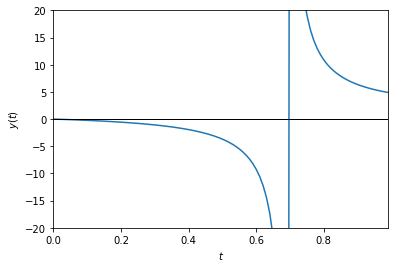

In [23]:
import numpy as np
from pandas import DataFrame

a = -1
p = 2
q = 1

t = np.arange(0, 1, 0.01)
y = p*q*((1-np.exp(-a*(p-q)*t))/(p-q*np.exp(-a*(p-q)*t)))

ax = DataFrame({'t': t, 'y': y}).set_index('t').plot(legend=None)
ax.set(ylim=(-20, 20), xlim=(0, 0.99), xlabel='$t$', ylabel='$y(t)$')
ax.axhline(0, color='k', lw=1)
pass

In this example $t^* = \log 2 \approx 0.693147$. One can see from the plot that only before this critical time the closed form formula is the solution to the initial value problem. 

If $t^*$ is complex or if it is real negative then the closed form formula gives the solution for all $t\ge 0$. When $p$ and $q$ are both real, the critical value $t^*$ is real positive if and only if $a$ is real negative, which is not the case in the CIR interest rate model. That is why the CIR model never runs into this issue. The Heston model with $p$ and $q$ both complex, however, is not so lucky. 

## Checking if an Integer Is a Perfect Square

The goal here is to prove that Newton's method with integer division can be used to determine if an integer is a perfect square. 

This method is discussed (without proof) in a [stackoverflow post](https://stackoverflow.com/questions/2489435/check-if-a-number-is-a-perfect-square), which gives the following procedure. It works for any large integer, for example 123456789**100 which is too large to convert to float for implementations relying on ```math.sqrt```. 

In [11]:
%%time

def is_square(a):
    x = a//2
    seen = set([x])
    while x*x != a:
        x = (x + a//x)//2
        if x in seen:
            return False
        seen.add(x)
    return True

print(is_square(123456789**100))

True
CPU times: user 12 ms, sys: 8 ms, total: 20 ms
Wall time: 16.5 ms


Assuming $x\in\mathbb N, \sqrt{a}\in\mathbb N$ and $x>\sqrt{a}$, with the usual division it is not hard to show that 
\begin{align*}
x > \frac{x+\frac{a}{x}}{2} > \sqrt{a}, 
\end{align*}
so the convergence is guaranteed. 


With integer division, the first inequality still holds as $(x+a/x)/2$ is just going to become smaller after we throw away the remainder terms. 


The second inequality only holds if the $>$ is rewritten as $\geq$, and here is why. With integer division, we are really looking at 
\begin{align*}
\frac{x+\frac{a - r_1}{x} - r_2}{2} = \frac{x+\frac{a}{x}}{2} -\left( \frac{r_1}{2x} + \frac{r_2}{2}\right), 
\end{align*}
where $r_1$ and $r_2$ are the remainders from the division. Since they must satisfy $r_1 < x$, $r_2\leq 1$, we have
\begin{align*}
\frac{r_1}{2x} + \frac{r_2}{2} < \frac12 + \frac12 = 1. 
\end{align*}
Since $\sqrt{a}$ is an integer, we must have
\begin{align*}
\frac{x+\frac{a}{x}}{2} - \left( \frac{r_1}{2x} + \frac{r_2}{2}\right) > \sqrt{a} - 1 \geq \sqrt{a}.
\end{align*}

To sum up, the following inequality holds if $\sqrt{a}$ is an integer and if the division in it represents the integer division: 
\begin{align*}
x > \frac{x+\frac{a}{x}}{2} \geq \sqrt{a}.
\end{align*}
Thus the convergence is again guaranteed. 


THE ABOVE PROOF IS FLAWED! Just because it converges does not mean it converges to $\sqrt{a}$. A rigorous proof starts with investigating the error
\begin{align*}
\frac{1}{2x}\left(x - \sqrt{a}\right)^2 - \left( \frac{r_1}{2x} + \frac{r_2}{2}\right), 
\end{align*}
which I do not have time to write down now. 

## Newton's Method for Square Root Has Exponential Convergence

Note that
\begin{align*}
\frac{x + \frac{a}{x}}{2} - \sqrt{a} &= \frac12\left(x -2\sqrt{a} + \frac{a}{x}\right)\\
&= \frac12\left(\sqrt{x} - \sqrt{\frac{a}{x}}\right)^2\\
&= \frac{1}{2x}\left(x - \sqrt{a}\right)^2, 
\end{align*}
which says the error in the next iteration is the error in this iteration squared divided by $2x$.

## Simulation

This is to confirm the following is correct: 
\begin{align*}
\text{cov}\left(\int_0^T t\,dW_t, \int_0^T W_t \,dt\right) = \frac{T^3}{6}, 
\end{align*}
which is 1.3333 if $T=2$ like in the below simulation. 


Recall that $E(W(t)W(s)) = s\land t$. Roughly speaking, 
\begin{align*}
E\left(\int_0^T t\,dW_t\int_0^T W_t dt\right) &= E\left(\int_0^T\int_0^T s W_t \,dW_sdt\right)\\
&\approx E\left(\sum_i\sum_j s_j W(t_i) (W(s_{j+1}) - W(s_j)) \Delta t\right)\\
&\approx \sum_i\sum_j s_j \left[E(W(t_i)W(s_{j+1})) - E(W(t_i)W(s_j))\right] \Delta t \\
&\approx \sum_i\sum_j s_j \left[ \Delta s1_{\{t_i>s_j\}} \right] \Delta t \\
&\approx \iint\limits_{t>s} s \,ds dt = \frac{T^3}{6}.
\end{align*}

In [2]:
%%time
import numpy as np
from scipy.stats import norm
from pandas import Series

n = 10000
T = 2

sample_size = 10000
sample = []
for i in range(sample_size):
    w = Series(norm.rvs(loc=0, scale=np.sqrt(T/n), size=n).cumsum()).shift(1, fill_value=0)
    w.index = w.index*T/n
    t = w.index
    sample.append((w.diff().dropna().values @ t[1:].values, w.sum()*T/n))

print(np.cov(np.array(sample).T))

[[2.65784801 1.33743398]
 [1.33743398 2.68333453]]
CPU times: user 23.2 s, sys: 41.1 ms, total: 23.2 s
Wall time: 24 s


## Inverse Mills Ratio 

We have the conditional expectation
\begin{eqnarray*}
E[X|X>K] &=& \frac{f_X(K)}{1-F_X(K)}, \\
E[X|X<K] &=& -\frac{f_X(K)}{F_X(K)}, 
\end{eqnarray*}
where the last one is what's known as the [inverse Mills ratio](https://en.wikipedia.org/wiki/Mills_ratio#Inverse_Mills_ratio) taking negative. Below is a simulation using the standard normal distribution. 

In [95]:
from numpy.random import normal
from scipy.stats import norm
n = 1000000
K = 1.5

a = norm.rvs(loc=0, scale=1, size=n)

print(a[a < K].mean())
print(-norm.pdf(K)/(norm.cdf(K)))

-0.13895207849237406
-0.13878975045885078


## Calculate the 41st Root in 1 Second

In [23]:
import random

print(54**41)

a = random.randrange(100)
a**41

106695020879414327538426959056889063841348427743537143096812648481685504


10947877107572929152919737180202022857988400441953615872

In [24]:
a

22

## $3^4$ vs. $4^3$ which one is bigger? 

（和[常見的微分作法](https://www.youtube.com/watch?v=L0XY6llSzyo)不同）

\begin{eqnarray*}
\frac{d}{da} a^b &=& a^b\left(\frac{b}{a}\right)\\
\frac{d}{db} a^b &=& a^b\ln a
\end{eqnarray*}
so 
\begin{eqnarray*}
(a+h)^b &\approx& a^b + h(a^b\left(\frac{b}{a}\right))\\
a^{b+h} &\approx& a^b + h(a^b\ln a)
\end{eqnarray*}

從 $3^3$ 開始，要把 1 加在底數還是指數會讓值變得更大？（相當於 $a=b=3, h=1$）看上面的式子可以猜到加在指數更好，也就是 $3^4$ 較大。


泰展多寫幾項也可以比出 $e^{\pi} > \pi^e$。和微分作法一樣可以推出更一般的結論：當指數和底數都大於 $e$ 時，指數比較大者數值就比較大。但像 $2.5^3$ 和 $3^{2.5}$ 這種兩個數分別在 $e$ 的左右時微分作法比不出來，這裡的泰展作法比較好比。不過泰展本來就是在計算數值，有點作弊。


## 複數直式開平方法

$\sqrt{2+17i} = 3.0917 + 2.74929i$. 

雖然計算複雜但可以算出來：

### 第一位算法

虛部為 $b$ 的水平線平方參數式：$(t+bi)^2 = t^2-b^2 + 2bti$。令 $x=t^2-b^2, y=2bt$，消去 $t$ 得方程式 
$$
\left(\frac{y}{2b}\right)^2- b^2 = x, 
$$
這是一個在複數平面上開口向右的拋物線。當 $b$ 增加，拋物線會不斷往左移。現在只考慮第一象限，可以移項得到 $b\sqrt{b^2+x} = y/2$。代入和 $x, y$ 並移動 $b$ 直到變號就是 $x+yi$ 跑到拋物線的另一邊了。可以推出，虛部的第一位就是最大的 $b$ 使得
$$
b\sqrt{b^2+x} \leq y/2, 
$$
實部的第一位就是最大的 $a$ 使得
$$
a\sqrt{a^2-x} \leq y/2. 
$$
代入 $x=2, y=17$ 得 $a=3, b=2$。當遇到 $x>100$ 或 $y>100$，還是只需要取最前面一節就好了，所以不會超過 100。這兩個式子很容易心算。


從上面兩個式子可以看出 $a\leq b$，這是因為我們限定要開的數在第一象限，所以答案的幅角一定小於 $45^\circ$。也可以移項重新整理得
\begin{eqnarray*}
a = \left\lfloor\sqrt{\frac{\sqrt{x^2+y^2}+x}{2}}\right\rfloor, \quad b = \left\lfloor\sqrt{\frac{\sqrt{x^2+y^2}-x}{2}}\right\rfloor
\end{eqnarray*}
但用這兩個式子並不會比較好算。



### 已知目前位數 $a_0, b_0$ 求下一位 $a_1, b_1$ 的算法

虛部必須滿足 $b^4 + xb^2 \leq y^2/4$。放大 $10^4$ 倍並令 $b_0=2, b=10b_0+b_1$：
$$
(10b_0+b_1)^4 + 100x(10b_0+b_1)^2 \leq 10^4(y^2/4)
$$
移項整理得 $b_1$ 為最大的數使得
$$
b_1 (1000 b_0(4b_0^2 + 2x) + 100b_1(6b_0^2+x) + 10(4b_0b_1^2) + b_1^3)\leq 10^4(y^2/4 - b_0^4 - x b_0^2). 
$$
代入 $x=2, y=17, b_0 = 2$ 得
$$
b_1 (40000 + 2600b_1 + 80b_1^2 + b_1^3)\leq 482500
$$
最大可行解是 $b_1 = 7$。


求下一位的迭代用 $b_0=27$ 
\begin{eqnarray*}
&&(10b_0+b_1)^4 + 10000x(10b_0+b_1)^2 \leq 10^8(y^2/4), \\
&&b_1 (1000 b_0(4b_0^2 + 200x) + 100b_1(6b_0^2+100x) + 10(4b_0b_1^2) + b_1^3)\leq 10^4((100y)^2/4 - b_0^4 - x b_0^2). 
\end{eqnarray*}


求 $a_1$ 的算法類似，只要把上面所有不等式的 $x$ 改成 $-x$。



### 上面那堆都是垃圾

因為所有第一象限的複數平方根都開的出來：
$$
\sqrt{x+yi} = \sqrt{\frac{\sqrt{x^2+y^2}+x}{2}} + i \sqrt{\frac{\sqrt{x^2+y^2}-x}{2}}
$$
但是照上面的方法可以算出任何第一象限複數開三次方之後實數的 closed form（下面是用 m8 導的，虛部也算的出來）：
$$
Re\left[\sqrt[3]{x+yi}\right] = \sqrt[3]{\frac{3}{8} \left(\frac{x^2+y^2}{\sqrt[3]{x^3+x y^2+\sqrt{-y^2 
\left(x^2+y^2\right)^2}}}+\sqrt[3]{x^3+x y^2+\sqrt{-y^2 \left(x^2+y^2\right)^2}}\right)+\frac{x}{4}}
$$
這個式子在真正代入第一象限的複數時就會出現 $i$，結果就是 $\cos(20^\circ)$ 的 closed form 還是不知道能不能把 $i$ 從根號裡拉出來（感覺不行）。



## $\cos(1^\circ)$ in Closed Form

用三倍角公式和 $\cos(60^\circ)=1/2$ 加上卡當諾公式可以算出 $\cos(20^\circ)$ 的 closed form。再利用 $\sin(18^\circ)=(-1+\sqrt 5)/4$ 跟和角公式可以算出 $\cos(2^\circ) = \cos(20^\circ - 18^\circ)$。最後用半角公式，可以算出

\begin{eqnarray*}
\cos(1^\circ) &=& \sqrt{\frac{1}{2} \left(1+\frac{1}{4} \sqrt{\frac{1}{2} \left(5+\sqrt{5}\right)}
   \left(\sqrt[3]{\frac{1}{2} \left(1-i \sqrt{3}\right)}+\sqrt[3]{\frac{1}{2} \left(1+i
   \sqrt{3}\right)}\right)+\frac{1}{4} \left(\sqrt{5}-1\right) \sqrt{1-\frac{1}{4}
   \left(\sqrt[3]{\frac{1}{2} \left(1-i \sqrt{3}\right)}+\sqrt[3]{\frac{1}{2} \left(1+i
   \sqrt{3}\right)}\right)^2}\right)} 
\end{eqnarray*}

可惜有 $i$ 在根號裡不知道開不開的出來（像 $\sqrt{1+i}$ 就開的出來）所以有這個公式還是沒辦法用古典的方法把數值算出來。$\cos(1^\circ)$ 的數值大約是 0.999848。

為了計算 $\cos(1^\circ)$ 的數值，與其設計複數直式開方來計算上面這個公式的值，還不如設計直式解三次方式程求 $\cos(20^\circ)$。有沒有辦法直接直式計算 $\cos(x^\circ)$？


把 $\cos(30^\circ)=\sqrt{3}/2$ 拿出套半角公式算出 $\cos(15^\circ)$，再用 $\cos(18^\circ)$ 的值和合角公式就可以算出
$$
\cos(3^\circ) = \frac{1}{8} \left(\sqrt{2-\sqrt{3}} \left(\sqrt{5}-1\right)+\sqrt{2 \left(2+\sqrt{3}\right) \left(5+\sqrt{5}\right)}\right)
$$
這個是真正的 closed form，沒有任何複數，可以直接用這個公式算出數值。有了這個值，再用卡當諾公式解 $4x^3-3x = \cos(3^\circ)$ 就得到
\begin{eqnarray*}
\cos(1^\circ) &=& \frac{1}{4} \left(\sqrt[3]{\sqrt{2-\sqrt{3}} \left(\sqrt{5}-1\right)+\sqrt{2 \left(2+\sqrt{3}\right) \left(5+\sqrt{5}\right)}-2 \sqrt{-8+\sqrt{3}+\sqrt{15}-\sqrt{\frac{1}{2}
   \left(5+\sqrt{5}\right)}+\sqrt{\frac{1}{2} \left(25+5 \sqrt{5}\right)}}}\right.\\
   &&+\left.\sqrt[3]{\sqrt{2-\sqrt{3}} \left(\sqrt{5}-1\right)+\sqrt{2 \left(2+\sqrt{3}\right)
   \left(5+\sqrt{5}\right)}+2 \sqrt{-8+\sqrt{3}+\sqrt{15}-\sqrt{\frac{1}{2} \left(5+\sqrt{5}\right)}+\sqrt{\frac{1}{2} \left(25+5 \sqrt{5}\right)}}}\right)
\end{eqnarray*}
這個公式乍看之下沒有複數但實際上是作弊的因為根號裡面有負數。結果就是這個公式的數值還是沒辦法用直式開方法算出來。
